In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
import math

from utils.explore import *

In [2]:
np.random.seed(12)
races = ["asian", "black", "hispn", "other", "white"]
voter_race = np.random.choice(a=races, p=[0.05, 0.15, 0.25, 0.05, 0.5], size=1000)
voter_age = stats.poisson.rvs(loc=18, mu=30, size=1000)

voter_frame = pd.DataFrame({"race": voter_race, "age": voter_age})
groups = voter_frame.groupby("race").groups

asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispn = voter_age[groups["hispn"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]

In [3]:
stats.f_oneway(asian, black, hispn, other, white)

F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)

### Set up an ANOVA where the mean of one group is actually different from the others

In [98]:
np.random.seed(12)

races = ["black", "hispn", "other", "white"]
probs = np.array([0.2, 0.2, 0.15, 0.4]) / 0.95

list_races = np.random.choice(a=races, p=probs, size=950)
list_ages = stats.poisson.rvs(loc=21, mu=30, size=950)
dfr = pd.DataFrame({"race": list_races, "age": list_ages})
dfa = pd.DataFrame({"race": "asian", "age": stats.poisson.rvs(loc=17, mu=30, size=50)})
df = pd.concat((dfr, dfa), axis=0)

In [99]:
races = df["race"].unique()
groups = [df[df["race"] == race]["age"] for race in races]
stats.f_oneway(*groups)

F_onewayResult(statistic=3.1081563028275365, pvalue=0.014814631699604605)

In [100]:
race_pairs = []
for idx1 in range(4):
    for idx2 in range(idx1 + 1, 5):
        race_pairs.append((races[idx1], races[idx2]))

for r1, r2 in race_pairs:
    print("""{}, {}\nstatistic: {:.4f}\npvalue: {:.4f}\n""".format(
        r1, r2,
        *stats.ttest_ind(
            df[df["race"] == r1]["age"], 
            df[df["race"] == r2]["age"]
        )
    ))

black, white
statistic: -0.0915
pvalue: 0.9271

black, hispn
statistic: -0.0948
pvalue: 0.9245

black, other
statistic: -0.1791
pvalue: 0.8580

black, asian
statistic: 3.2060
pvalue: 0.0015

white, hispn
statistic: -0.0188
pvalue: 0.9850

white, other
statistic: -0.1155
pvalue: 0.9081

white, asian
statistic: 3.3587
pvalue: 0.0008

hispn, other
statistic: -0.0863
pvalue: 0.9313

hispn, asian
statistic: 3.0707
pvalue: 0.0024

other, asian
statistic: 3.1041
pvalue: 0.0022



In [103]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(
    endog=df["age"],
    groups=df["race"],
    alpha=0.05
)
tukey.summary()

group1,group2,meandiff,lower,upper,reject
asian,black,2.653,0.3581,4.9479,True
asian,hispn,2.7032,0.425,4.9813,True
asian,other,2.7538,0.3754,5.1322,True
asian,white,2.6946,0.5372,4.852,True
black,hispn,0.0502,-1.4114,1.5118,False
black,other,0.1008,-1.5125,1.7142,False
black,white,0.0416,-1.2235,1.3067,False
hispn,other,0.0506,-1.5388,1.6401,False
hispn,white,-0.0086,-1.243,1.2259,False
other,white,-0.0592,-1.4701,1.3516,False


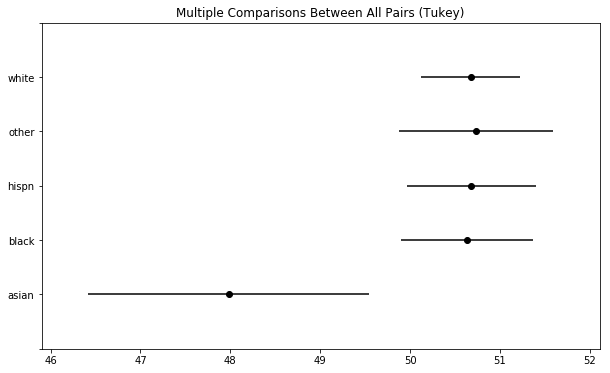

In [104]:
_ = tukey.plot_simultaneous()